# Step 1

In [2]:
#Import libraries 

import pandas as pd
import numpy as np
import os

In [3]:
#Import the df from Exercise 4.7.

#Create a path

path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/Instacart Basket Analysis'

#Import the df 

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'orders_products_merged_finall_with flags.pkl'))

In [4]:
ords_prods_merge = ords_prods_merge.drop(columns = ['Unnamed: 0'])

# Step 2

In [5]:
#Find the aggregated mean of the “order_number” column grouped by “department_id” for the whole df

ords_prods_merge.groupby('department_id')['order_number'].mean()

department_id
1     15.457838
2     17.277920
3     17.170395
4     17.811403
5     15.215751
6     16.439806
7     17.225802
8     15.340650
9     15.895474
10    20.197148
11    16.170638
12    15.887671
13    16.583536
14    16.773669
15    16.165037
16    17.665606
17    15.694469
18    19.310397
19    17.177343
20    16.473447
21    22.902379
Name: order_number, dtype: float64

# Step 3

**In general, the tendency remained the same (department 21 leading), however, it can be seen that the values outside the subset influence the subset's values (making the mean of order numbers higher or lower). E.g., for departments 10 or 21 the influence in significant.**

# Step 4

In [6]:
#Creating a loyalty flag for existing customers using the transform() and loc() functions

#Use the transform function first

ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [7]:
pd.options.display.max_rows = None

In [8]:
#Check the created column 

ords_prods_merge[['user_id','max_order']].head(100)

user_id  max_order
0       138         32
1       138         32
2       709          5
3       764          3
4       764          3
5       777         26
6       825          9
7       910         12
8      1052         20
9      1052         20
10     1379         10
11     1480         43
12     1480         43
13     1480         43
14     1494         13
15     1494         13
16     1494         13
17     1540         28
18     1540         28
19     1540         28
20     1540         28
21     1540         28
22     1540         28
23     1540         28
24     1540         28
25     1540         28
26     1540         28
27     1540         28
28     1540         28
29     1540         28
30     1540         28
31     1540         28
32     1540         28
33     1540         28
34     1598          4
35     1598          4
36     1598          4
37     1647         10
38     1647         10
39     1647         10
40     1647         10
41     1647         10
42     2833         10
43     2850         23
44     2857         25
45     3010         13
46     3029          5
47     3395          6
48     3904          3
49     4006         42
50     4006         42
51     4006         42
52     4006         42
53     4006         42
54     4122         40
55     4141          9
56     4343          4
57     4553          4
58     4845         14
59     6866          6
60     7275          8
61     7669         21
62     7669         21
63     7669         21
64     7981         31
65     7981         31
66     7981         31
67     7981         31
68     7981         31
69     8703         99
70     8723         36
71     8735          9
72     9293          5
73     9293          5
74     9467          5
75     9694         23
76     9694         23
77     9694         23
78     9694         23
79     9694         23
80     9694         23
81     9694         23
82     9694         23
83     9694         23
84     9694         23
85     9694         23
86     9848         23
87    10113         11
88    10315          5
89    10479         22
90    10708         21
91    10708         21
92    10789         36
93    10789         36
94    10789         36
95    10831         10
96    11119         23
97    11186         26
98    11243         43
99    11448         21

In [9]:
#Create a flag for loyal customers 

ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'


In [10]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'


In [11]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [12]:
#Check using the value counts 

ords_prods_merge['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [13]:
#Display multiple columns, the first 20 rows

ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(20)

user_id      loyalty_flag  order_number
0       138  Regular customer            28
1       138  Regular customer            30
2       709      New customer             2
3       764      New customer             1
4       764      New customer             3
5       777  Regular customer            16
6       825      New customer             3
7       910  Regular customer            12
8      1052  Regular customer            10
9      1052  Regular customer            15
10     1379      New customer             1
11     1480    Loyal customer            36
12     1480    Loyal customer            38
13     1480    Loyal customer            39
14     1494  Regular customer             6
15     1494  Regular customer             7
16     1494  Regular customer             9
17     1540  Regular customer             4
18     1540  Regular customer             5
19     1540  Regular customer             6

# Step 5

In [14]:
#Determine is whether the prices of products purchased by loyal customers differ from those 
#purchased by regular or new customers.

ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.294670  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

Comment: loyal customers prefer to spend less money, whereas new customers spend the most, and regular customers are in the middle.  

# Step 6

In [15]:
# Create a spending flag for each user based on the average price across all their orders
#First, perform the transform function to create a column for mean_prices 

ords_prods_merge['mean_prices'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [16]:
mean = ords_prods_merge['prices'].mean()

In [17]:
std = ords_prods_merge['prices'].std()

In [18]:
#Checking the result
ords_prods_merge.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id  order_number  orders_day_of_week  orders_time  \
0   3139998      138            28                   6           11   
1   1977647      138            30                   6           17   
2    389851      709             2                   0           21   
3    652770      764             1                   3           13   
4   1813452      764             3                   4           17   

   days_since_prior_order  add_to_cart_order  reordered _merge  \
0                     3.0                  5          0   both   
1                    20.0                  1          1   both   
2                     6.0                 20          0   both   
3                     NaN                 10          0   both   
4                     9.0                 11          1   both   

     price_range_loc     busiest day busiest_period_of_day  max_order  \
0  Mid-range product  Regularly busy           Most orders         32   
1  Mid-range product  Regularly busy        Average orders         32   
2  Mid-range product     Busiest day        Average orders          5   
3  Mid-range product      Least busy           Most orders          3   
4  Mid-range product      Least busy        Average orders          3   

       loyalty_flag  mean_prices  
0  Regular customer     6.935811  
1  Regular customer     6.935811  
2      New customer     7.930208  
3      New customer     4.972414  
4      New customer     4.972414

In [19]:
# Create a spending flag for each user based on the average price across all their orders

ords_prods_merge.loc[ords_prods_merge['mean_prices'] >= mean + std, 'spender_type'] = 'High spender'


In [20]:
ords_prods_merge.loc[ords_prods_merge['mean_prices'] < 10, 'spender_type'] = 'Low spender'


In [21]:
#Checking the frequency of the spender flags 

ords_prods_merge['spender_type'].value_counts(dropna=False)

Low spender     31770614
NaN               579611
High spender       54634
Name: spender_type, dtype: int64

In [22]:
#Display multiple columns, the first 100 rows

ords_prods_merge[['user_id', 'spender_type', 'mean_prices']].head(100)

user_id spender_type  mean_prices
0       138  Low spender     6.935811
1       138  Low spender     6.935811
2       709  Low spender     7.930208
3       764  Low spender     4.972414
4       764  Low spender     4.972414
5       777  Low spender     6.935398
6       825  Low spender     5.957576
7       910  Low spender     6.680000
8      1052  Low spender     7.162500
9      1052  Low spender     7.162500
10     1379  Low spender     5.813636
11     1480  Low spender     5.081633
12     1480  Low spender     5.081633
13     1480  Low spender     5.081633
14     1494  Low spender     6.803797
15     1494  Low spender     6.803797
16     1494  Low spender     6.803797
17     1540  Low spender     6.607122
18     1540  Low spender     6.607122
19     1540  Low spender     6.607122
20     1540  Low spender     6.607122
21     1540  Low spender     6.607122
22     1540  Low spender     6.607122
23     1540  Low spender     6.607122
24     1540  Low spender     6.607122
25     1540  Low spender     6.607122
26     1540  Low spender     6.607122
27     1540  Low spender     6.607122
28     1540  Low spender     6.607122
29     1540  Low spender     6.607122
30     1540  Low spender     6.607122
31     1540  Low spender     6.607122
32     1540  Low spender     6.607122
33     1540  Low spender     6.607122
34     1598  Low spender     7.123529
35     1598  Low spender     7.123529
36     1598  Low spender     7.123529
37     1647  Low spender     4.853521
38     1647  Low spender     4.853521
39     1647  Low spender     4.853521
40     1647  Low spender     4.853521
41     1647  Low spender     4.853521
42     2833  Low spender     7.377143
43     2850  Low spender     8.054153
44     2857  Low spender     8.353793
45     3010  Low spender     6.452800
46     3029  Low spender     7.960606
47     3395  Low spender     6.322222
48     3904  Low spender     7.511111
49     4006  Low spender     7.441100
50     4006  Low spender     7.441100
51     4006  Low spender     7.441100
52     4006  Low spender     7.441100
53     4006  Low spender     7.441100
54     4122  Low spender     7.598765
55     4141  Low spender     6.033333
56     4343  Low spender     7.393939
57     4553  Low spender     5.715789
58     4845  Low spender     7.229630
59     6866  Low spender     4.807143
60     7275  Low spender     4.620833
61     7669  Low spender     9.106757
62     7669  Low spender     9.106757
63     7669  Low spender     9.106757
64     7981  Low spender     7.115714
65     7981  Low spender     7.115714
66     7981  Low spender     7.115714
67     7981  Low spender     7.115714
68     7981  Low spender     7.115714
69     8703  Low spender     6.593459
70     8723  Low spender     5.677397
71     8735  Low spender     5.850000
72     9293          NaN    11.857143
73     9293          NaN    11.857143
74     9467  Low spender     7.709091
75     9694  Low spender     7.075354
76     9694  Low spender     7.075354
77     9694  Low spender     7.075354
78     9694  Low spender     7.075354
79     9694  Low spender     7.075354
80     9694  Low spender     7.075354
81     9694  Low spender     7.075354
82     9694  Low spender     7.075354
83     9694  Low spender     7.075354
84     9694  Low spender     7.075354
85     9694  Low spender     7.075354
86     9848  Low spender     8.312203
87    10113  Low spender     8.769565
88    10315          NaN    10.188889
89    10479  Low spender     7.779775
90    10708  Low spender     7.777403
91    10708  Low spender     7.777403
92    10789  Low spender     6.097701
93    10789  Low spender     6.097701
94    10789  Low spender     6.097701
95    10831  Low spender     7.494286
96    11119  Low spender     5.878641
97    11186  Low spender     6.618085
98    11243  Low spender     5.927149
99    11448  Low spender     5.981250

# Step 7

In [23]:
#Create an order frequency flag that marks the regularity of a user’s ordering behavior 
#according to the median in the “days_since_prior_order” column

In [24]:
#First, perform the transform function to create a column for median of days_since_prior_order

ords_prods_merge['median_days_since_prior_order'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [25]:
#Checking the result
ords_prods_merge.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id  order_number  orders_day_of_week  orders_time  ...  \
0   3139998      138            28                   6           11  ...   
1   1977647      138            30                   6           17  ...   
2    389851      709             2                   0           21  ...   
3    652770      764             1                   3           13  ...   
4   1813452      764             3                   4           17  ...   

   reordered  _merge    price_range_loc     busiest day busiest_period_of_day  \
0          0    both  Mid-range product  Regularly busy           Most orders   
1          1    both  Mid-range product  Regularly busy        Average orders   
2          0    both  Mid-range product     Busiest day        Average orders   
3          0    both  Mid-range product      Least busy           Most orders   
4          1    both  Mid-range product      Least busy        Average orders   

  max_order      loyalty_flag  mean_prices spender_type  \
0        32  Regular customer     6.935811  Low spender   
1        32  Regular customer     6.935811  Low spender   
2         5      New customer     7.930208  Low spender   
3         3      New customer     4.972414  Low spender   
4         3      New customer     4.972414  Low spender   

   median_days_since_prior_order  
0                            8.0  
1                            8.0  
2                            8.0  
3                            9.0  
4                            9.0  

[5 rows x 22 columns]

In [26]:
#Create an order frequency flag that marks the regularity of a user’s ordering behavior 
#according to the median in the “days_since_prior_order” column

ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'] > 20, 'user_activity'] = 'Non-frequent customer'


In [27]:
ords_prods_merge.loc[(ords_prods_merge['median_days_since_prior_order'] > 10) & (ords_prods_merge['median_days_since_prior_order'] <= 20), 'user_activity'] = 'Regular customer'


In [28]:
ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'] <= 10, 'user_activity'] = 'Frequent customer'


In [29]:
ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'].isna(), 'user_activity'] = 'New customer'

In [30]:
#Checking the frequency of the user_activity flags 

ords_prods_merge['user_activity'].value_counts(dropna=False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
New customer                    5
Name: user_activity, dtype: int64

In [31]:
#Display multiple columns, the first 100 rows

ords_prods_merge[['user_id', 'user_activity', 'median_days_since_prior_order']].head(100)

user_id          user_activity  median_days_since_prior_order
0       138      Frequent customer                            8.0
1       138      Frequent customer                            8.0
2       709      Frequent customer                            8.0
3       764      Frequent customer                            9.0
4       764      Frequent customer                            9.0
5       777       Regular customer                           11.0
6       825       Regular customer                           20.0
7       910      Frequent customer                            6.0
8      1052      Frequent customer                           10.0
9      1052      Frequent customer                           10.0
10     1379       Regular customer                           20.0
11     1480      Frequent customer                            7.0
12     1480      Frequent customer                            7.0
13     1480      Frequent customer                            7.0
14     1494      Frequent customer                            7.0
15     1494      Frequent customer                            7.0
16     1494      Frequent customer                            7.0
17     1540      Frequent customer                            7.0
18     1540      Frequent customer                            7.0
19     1540      Frequent customer                            7.0
20     1540      Frequent customer                            7.0
21     1540      Frequent customer                            7.0
22     1540      Frequent customer                            7.0
23     1540      Frequent customer                            7.0
24     1540      Frequent customer                            7.0
25     1540      Frequent customer                            7.0
26     1540      Frequent customer                            7.0
27     1540      Frequent customer                            7.0
28     1540      Frequent customer                            7.0
29     1540      Frequent customer                            7.0
30     1540      Frequent customer                            7.0
31     1540      Frequent customer                            7.0
32     1540      Frequent customer                            7.0
33     1540      Frequent customer                            7.0
34     1598      Frequent customer                            2.0
35     1598      Frequent customer                            2.0
36     1598      Frequent customer                            2.0
37     1647  Non-frequent customer                           25.0
38     1647  Non-frequent customer                           25.0
39     1647  Non-frequent customer                           25.0
40     1647  Non-frequent customer                           25.0
41     1647  Non-frequent customer                           25.0
42     2833       Regular customer                           13.0
43     2850      Frequent customer                            7.0
44     2857       Regular customer                           11.0
45     3010      Frequent customer                            7.0
46     3029  Non-frequent customer                           28.0
47     3395       Regular customer                           18.0
48     3904  Non-frequent customer                           21.0
49     4006      Frequent customer                            7.0
50     4006      Frequent customer                            7.0
51     4006      Frequent customer                            7.0
52     4006      Frequent customer                            7.0
53     4006      Frequent customer                            7.0
54     4122      Frequent customer                            7.0
55     4141  Non-frequent customer                           30.0
56     4343  Non-frequent customer                           30.0
57     4553  Non-frequent customer                           30.0
58     4845       Regular customer                           20.0
59     6866  Non-frequent customer          

In [32]:
#Subset of New customers 

df_new_cust = ords_prods_merge[ords_prods_merge['user_activity']=='New customer']

In [33]:
df_new_cust[['user_id','user_activity','days_since_prior_order']].head()

user_id user_activity  days_since_prior_order
6234909    159838  New customer                     NaN
12947653   159838  New customer                     NaN
13839012   159838  New customer                     NaN
14758536   159838  New customer                     NaN
21673807   159838  New customer                     NaN

# Copied code from 4.9. (determining and removing outliers)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [44]:
#Run data consistency checks 

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [45]:
#Check the mean
ords_prods_merge['prices'].mean()

11.980225638383468

In [46]:
#Check the median
ords_prods_merge['prices'].median()

7.4

In [47]:
#Check the max. Here we can see an outlier
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

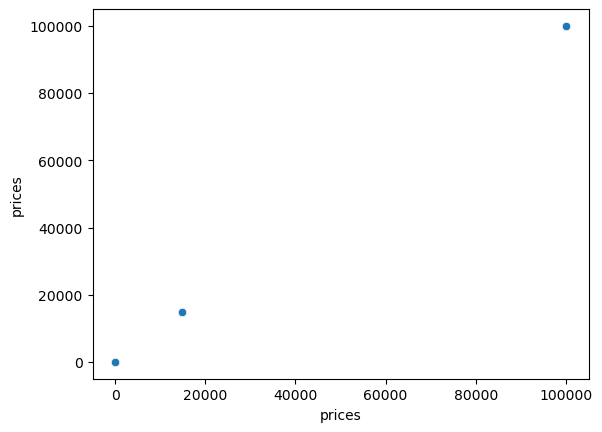

In [48]:
#Create a scatterplot to see the distribution of data points

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [51]:
#Filtering the outliers 

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]


product_id                      product_name  aisle_id  \
13100147       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100148       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100149       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100150       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100151       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100152       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100153       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100154       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100155       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100156       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100157       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100158       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100159       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100160       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100161       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100162       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100163       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100164       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100165       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100166       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100167       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100168       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100169       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100170       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100171       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100172       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100173       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100174       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100175       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100176       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100177       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100178       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100179       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100180       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100181       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100182       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100183       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100184       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100185       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100186       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100187       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100188       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100189       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100190       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100191       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100192       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100193       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100194       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100195       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100196       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100197       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100198       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100199       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100200       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100201       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100202       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100203       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100204       21553  Lowfat 2% Milkfat Cottage Cheese       108  

In [52]:
#Flag missing values as NaNs (replace them in the column 'prices')

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [53]:
#Check the max

ords_prods_merge['prices'].max()

25.0

# Step 9

In [35]:
#Export the updated df 

ords_prods_merge.to_pickle(os.path.join(path,'02 Data ', 'Prepared Data', 'orders_products_merged_finall_with flags_4_8.pkl'))

In [36]:
ords_prods_merge.index

Int64Index([       0,        1,        2,        3,        4,        5,
                   6,        7,        8,        9,
            ...
            32404849, 32404850, 32404851, 32404852, 32404853, 32404854,
            32404855, 32404856, 32404857, 32404858],
           dtype='int64', length=32404859)

In [37]:
ords_prods_merge.loc[32404858]

product_id                                        49688
product_name                     Fresh Foaming Cleanser
aisle_id                                             73
department_id                                        11
prices                                             13.5
order_id                                        2385091
user_id                                          205926
order_number                                         11
orders_day_of_week                                    1
orders_time                                          15
days_since_prior_order                              6.0
add_to_cart_order                                    35
reordered                                             0
_merge                                             both
price_range_loc                       Mid-range product
busiest day                                 Busiest day
busiest_period_of_day                       Most orders
max_order                                       